In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [155]:
data = pd.read_csv('people_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]

In [156]:
data.head(5)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
0,255,173,1.473988,443.271676,45,127,1,57,116,0,...,0,0,173,128.450867,2305.352601,2062.595376,81.606936,77.734104,184.537572,0.000000
1,251,60,4.183333,190.550000,59,1,0,36,24,0,...,0,0,60,42.500000,1457.166667,1670.283333,76.216667,42.283333,181.200000,0.000000
2,38,7,5.428571,718.571429,5,2,0,3,4,0,...,5,2,0,46.142857,1709.857143,1450.857143,0.000000,38.142857,115.857143,17.142857
3,157,27,5.814815,72.481481,25,2,0,25,2,0,...,0,0,27,42.703704,912.444444,1483.740741,0.000000,37.074074,99.333333,0.000000
4,245,179,1.368715,1549.659218,105,73,1,134,45,0,...,141,29,9,188.379888,2997.938547,2003.910615,121.268156,77.195531,0.000000,35.223464


In [157]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,286.681993,59.335691,5.202374,172.582329,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,64.574949,1314.700436,1269.000846,31.299723,46.689784,132.645318,6.102356
std,298.370319,54.571850,2.287778,3443.970487,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,33.941275,5338.761328,9694.444420,98.285936,29.029198,476.762875,31.467639
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.500000,42.000000,4.926972,80.617819,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.774849,1245.392857,29.154014,44.731238,127.341061,0.000000
75%,410.000000,92.000000,6.359022,134.026817,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,78.350909,1500.133041,1915.116205,49.166667,58.086413,162.077197,11.501404
max,2938.000000,187.000000,30.000000,342000.000000,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,875.837838,530000.000000,960000.000000,9000.000000,1605.552941,47000.000000,3000.000000


In [158]:
def boxplots(data):
    fig, axes = plt.subplots(4, 8, figsize=(20, 20))
    i = 0
    j = 0
    for feature in data.columns.values:
        sns.boxplot(ax=axes[i, j], x=data[feature])
        if j == 7:
            j = 0
            i += 1
        else:
            j += 1

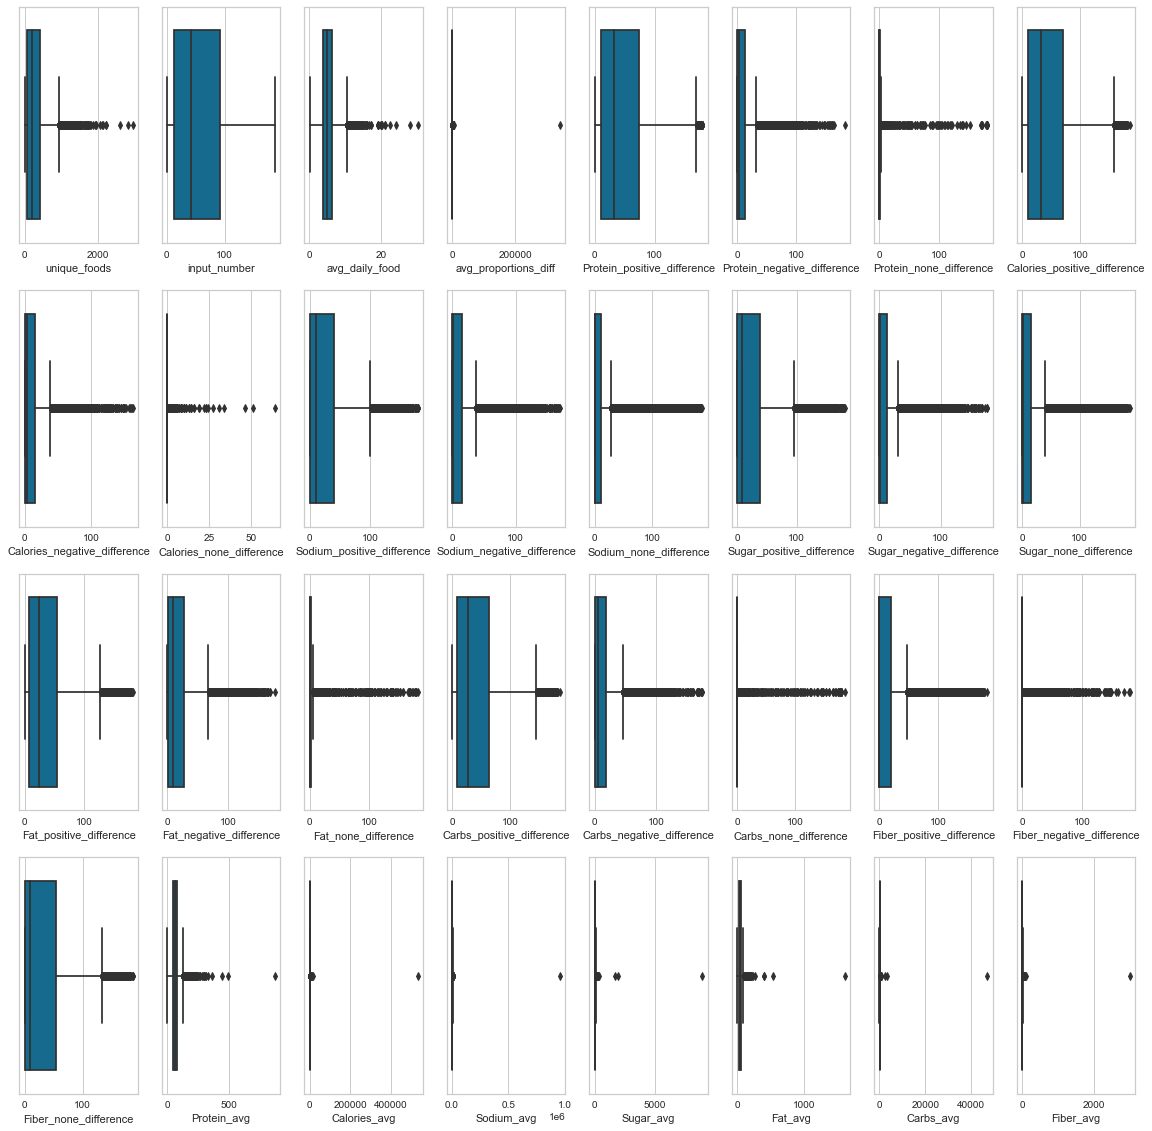

In [159]:
boxplots(data)

In [160]:
dic = {'unique_foods' : 2500, 'avg_daily_food' : 20, 'avg_proportions_diff' : 1000, 'Protein_avg' : 150, 
       'Calories_avg' : 8000, 'Sodium_avg' : 4800, 'Sugar_avg' : 1000, 'Fat_avg': 250, 'Carbs_avg' : 400,  'Fiber_avg' : 50}

In [161]:
for column in data.columns.values:
    if column not in dic:
        continue
    df = data.loc[:, [column]]
    for i in df.index:
        if df.iloc[i, 0] >= dic[column]:
            data.loc[i, [column]] = data[column].median()

In [162]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,285.898936,59.335691,5.182932,120.055106,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,61.930618,1257.590474,1162.918155,30.024305,46.387979,126.716735,5.715664
std,295.204716,54.571850,2.211731,134.520392,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,27.063352,454.781647,1012.938200,29.233348,23.292723,58.301445,8.920494
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.062500,42.000000,4.925374,80.615385,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.680958,1245.285714,29.149571,44.730784,127.340659,0.000000
75%,409.000000,92.000000,6.347161,131.000000,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,76.338539,1499.849580,1907.065312,49.140397,58.064732,161.636364,11.455492
max,2227.000000,187.000000,19.000000,998.735294,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,149.869863,5925.988950,4784.782123,335.111111,231.000000,389.000000,49.977778


In [163]:
data = data / data.max()

In [164]:
# from matplotlib.cbook import boxplot_stats  
# boxplot_stats(data.Fiber_avg).pop(0)['fliers']

In [165]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [166]:
hopkins(data)

0.9011522182158055

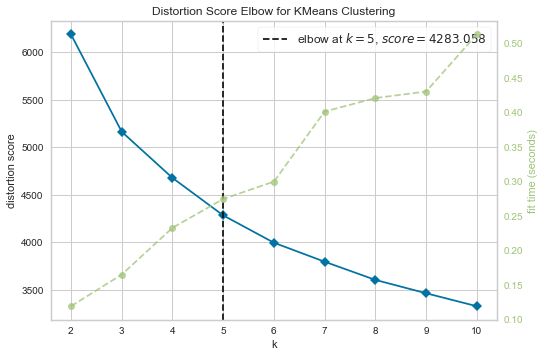

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(data)
visualizer.show()

In [168]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

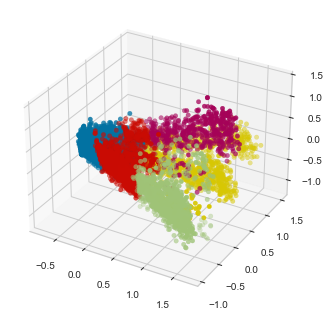

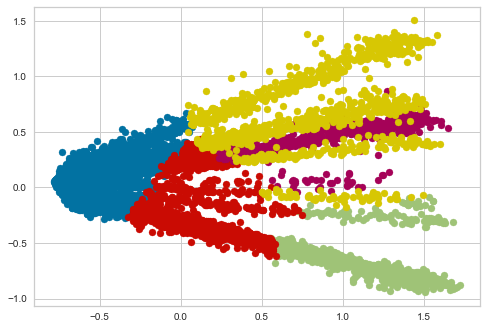

In [169]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 2)

In [170]:
data['clusters'] = 0
for i in range(len(clusters)):
    data.loc[clusters[i], ['clusters']] = i

In [171]:
for i in range(len(clusters)):
    print("cluster ", i, len(clusters[i]))

cluster  0 5103
cluster  1 938
cluster  2 2221
cluster  3 547
cluster  4 1087


In [172]:
def draw_clusters(data):
    columns = data.columns.values
    for column in columns:
        plt.figure(figsize=(10,4))
        sns.stripplot(data=data, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

<ipython-input-172-b0aa90144700>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


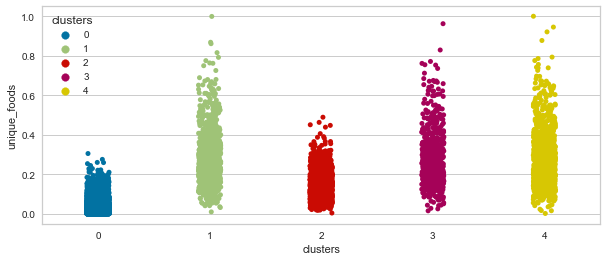

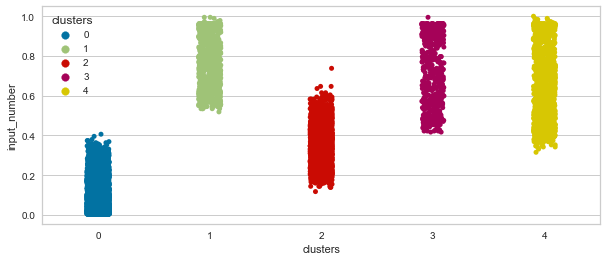

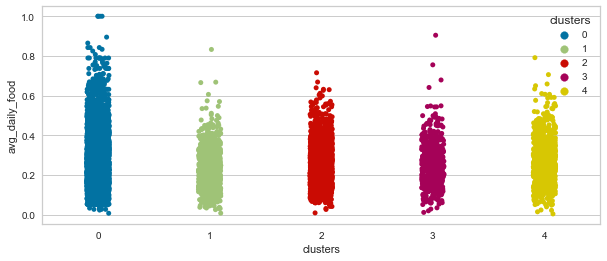

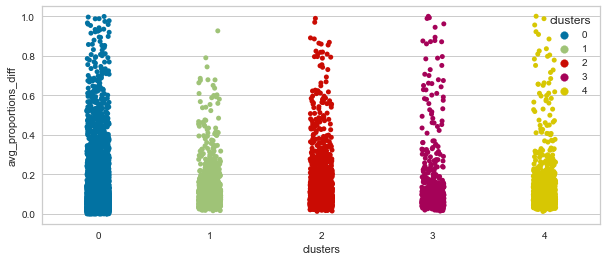

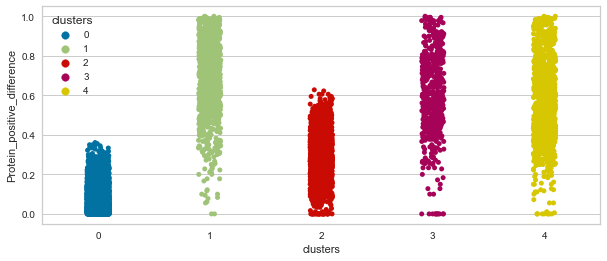

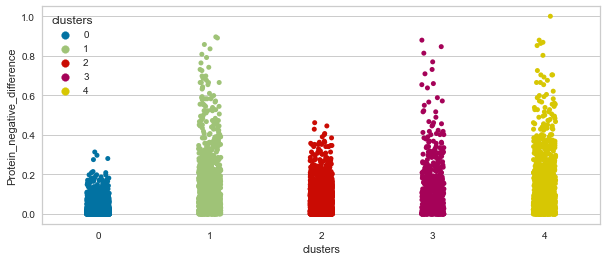

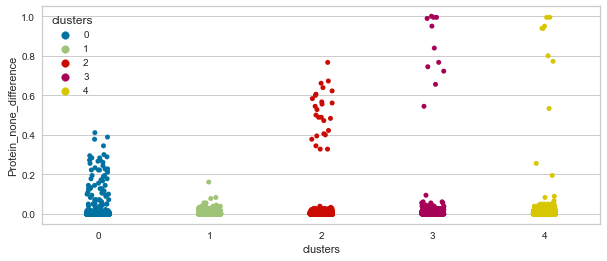

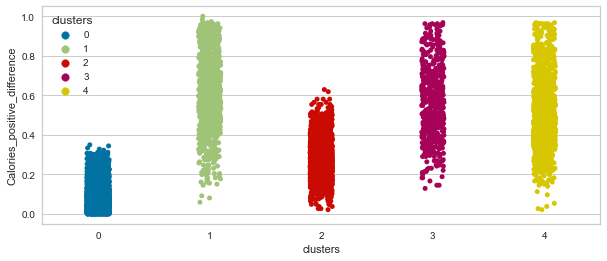

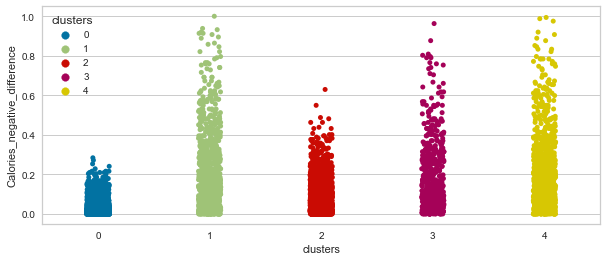

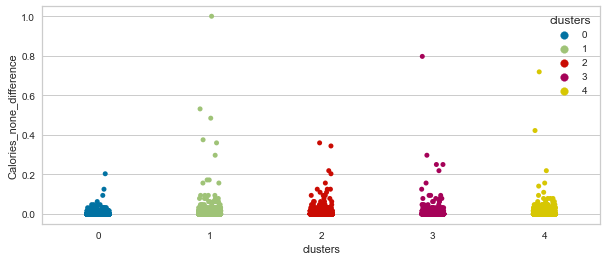

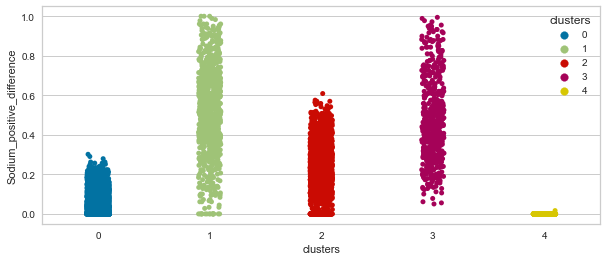

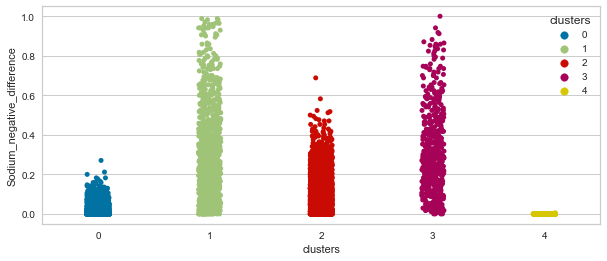

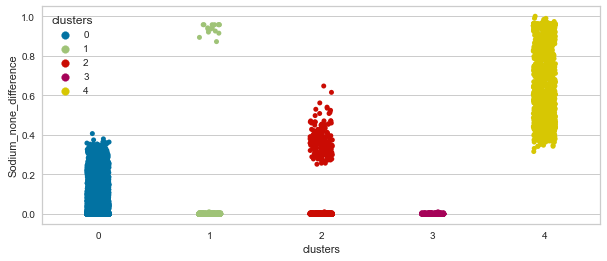

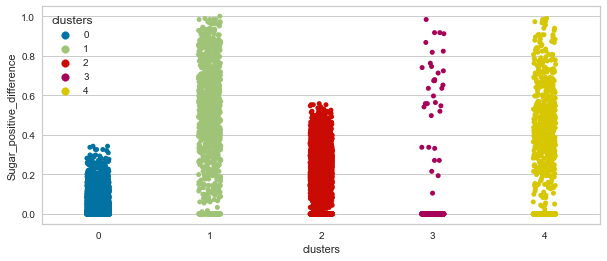

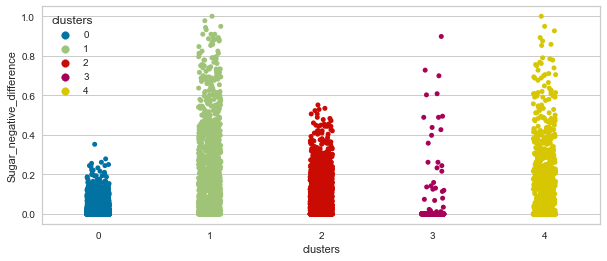

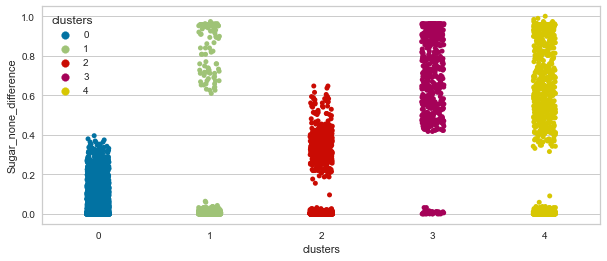

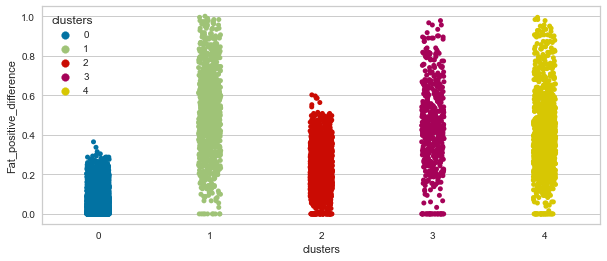

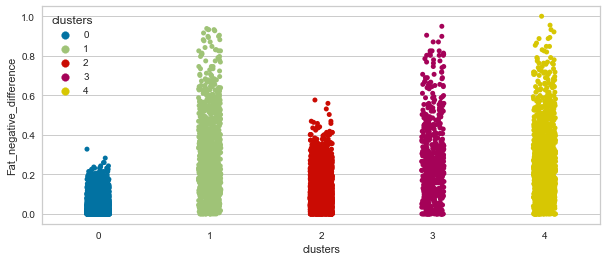

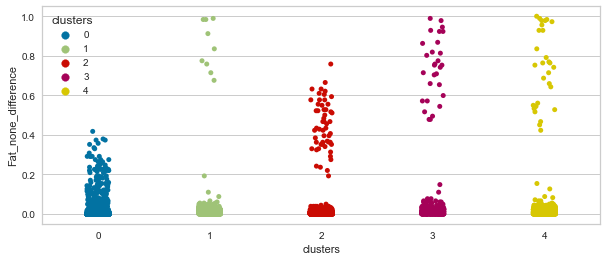

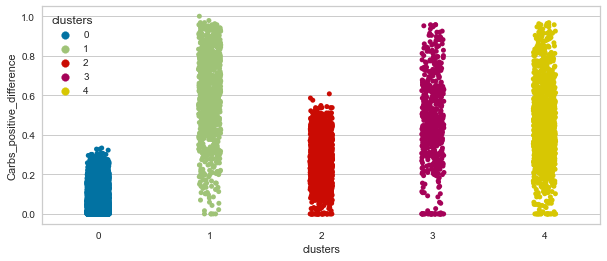

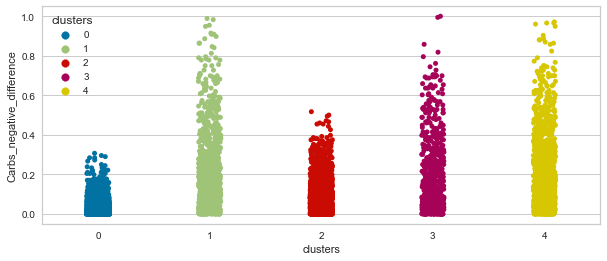

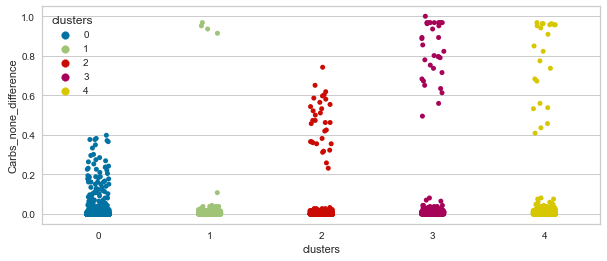

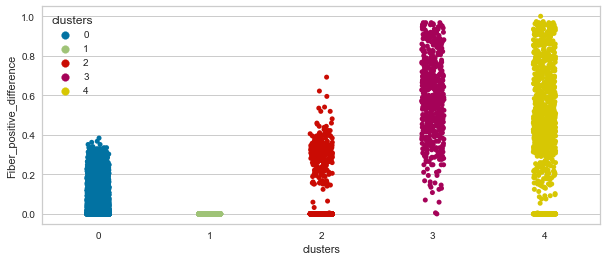

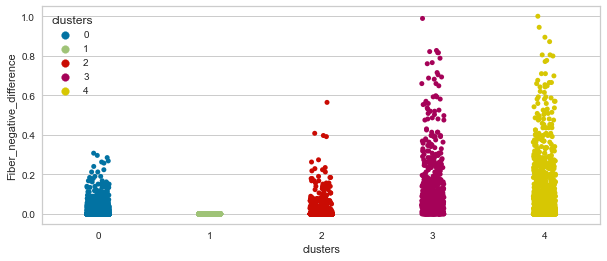

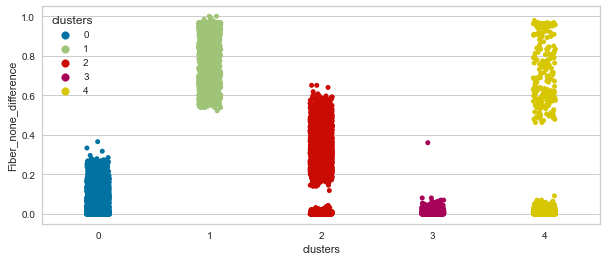

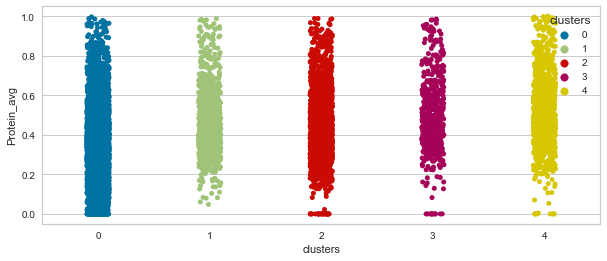

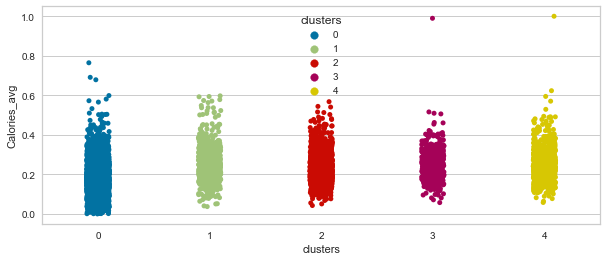

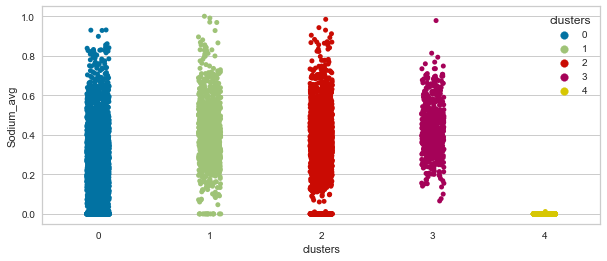

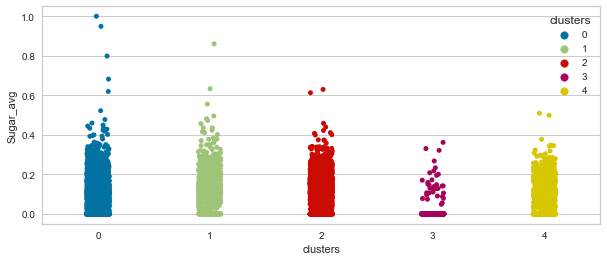

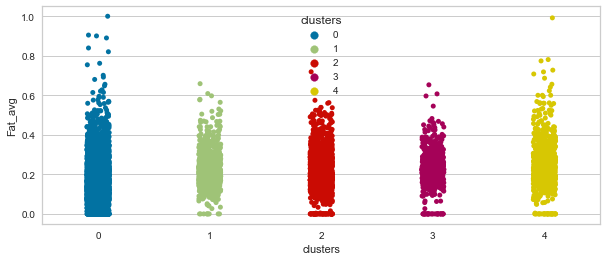

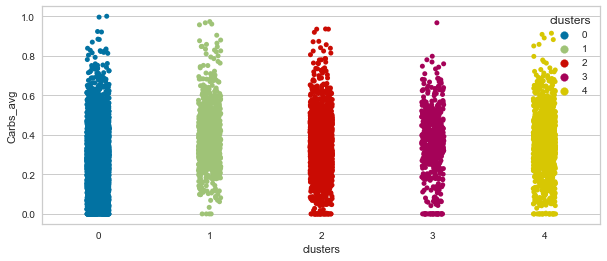

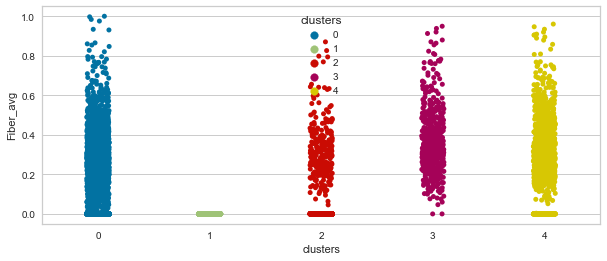

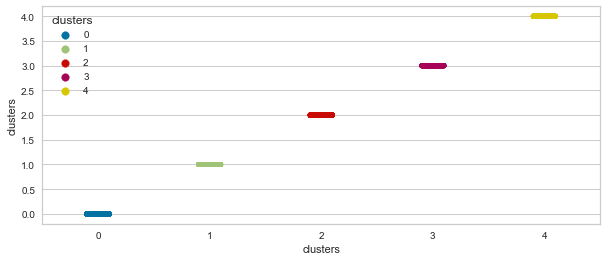

In [173]:
draw_clusters(data)